In [1]:
import pandas as pd
import pickle 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir("../results_v1"))

['results_shadr_token512_epoch5_batch32', 'results_medqa_token512_epoch5_batch32', 'results_bbq_token512_epoch-5_batch-32', 'results_cxr-report-multiclass_token512_epoch2_batch32']


In [3]:
import pickle
import pandas as pd

strong_results_dir = '../results_v1/results_medqa_token512_epoch5_batch32/strong_model_gt/EleutherAI_pythia-160m/step121000/results.pkl'
weak_results_dir = '../results_v1/results_medqa_token512_epoch5_batch32/weak_model_gt/EleutherAI_pythia-70m/step121000/results.pkl'
strong_transfer_dir = '../results_v1/results_medqa_token512_epoch5_batch32/strong_model_transfer/EleutherAI_pythia-70m_step121000_EleutherAI_pythia-160m_step121000_xent/results.pkl'

# Read the results pickle files
with open(strong_results_dir, 'rb') as f:
    strong = pickle.load(f)

# Read the results pickle files
with open(weak_results_dir, 'rb') as f:
    weak = pickle.load(f)

with open(strong_transfer_dir, 'rb') as f:
    strong_transfer = pickle.load(f)

In [4]:
strong_df = pd.DataFrame(strong['test_results'])
weak_df = pd.DataFrame(weak['test_results'])
strong_transfer_df = pd.DataFrame(strong_transfer['test_results'])
results_df = pd.concat([strong_df, weak_df, strong_transfer_df], axis=0, keys=['strong', 'weak', 'strong_transfer']).reset_index(level=0)
results_df = results_df.rename(columns={'level_0': 'model'})
results_df

,model,txt,input_ids,gt_label,pred_hard_label,acc,logits,soft_label
0,strong,Q: A junior orthopaedic surgery resident is co...,"[50, 27, 329, 19394, 9373, 20414, 39877, 5869,...",0,0,True,"[0.37400543689727783, -0.3740059435367584]","[0.6787452101707458, 0.32125476002693176]"
1,strong,Q: A 67-year-old man with transitional cell ca...,"[50, 27, 329, 9963, 14, 2913, 14, 744, 637, 34...",0,1,False,"[-1.0966973304748535, 1.0966968536376953]","[0.10034526139497757, 0.8996546864509583]"
2,strong,Q: Two weeks after undergoing an emergency car...,"[50, 27, 5761, 3618, 846, 17362, 271, 8945, 10...",1,0,False,"[0.678036093711853, -0.6780365705490112]","[0.7951206564903259, 0.20487934350967407]"
3,strong,Q: A 39-year-old woman is brought to the emerg...,"[50, 27, 329, 6931, 14, 2913, 14, 744, 3416, 3...",1,1,True,"[-1.3046934604644775, 1.3046932220458984]","[0.06853675097227097, 0.9314632415771484]"
4,strong,Q: A 35-year-old man comes to the physician be...,"[50, 27, 329, 4791, 14, 2913, 14, 744, 637, 32...",0,1,False,"[-1.3566125631332397, 1.3566124439239502]","[0.0621974840760231, 0.9378025531768799]"
...,...,...,...,...,...,...,...,...
1264,strong_transfer,Q: A 39-year-old woman presents to the clinic ...,"[50, 27, 329, 6931, 14, 2913, 14, 744, 3416, 1...",1,1,True,"[-0.8586342334747314, 0.8586330413818359]","[0.15222349762916565, 0.8477765321731567]"
1265,strong_transfer,Q: A 38-year-old woman comes to the physician ...,"[50, 27, 329, 6480, 14, 2913, 14, 744, 3416, 3...",1,1,True,"[-0.5650439262390137, 0.5650427937507629]","[0.24414511024951935, 0.7558549046516418]"
1266,strong_transfer,Q: A 21-year-old college student comes to the ...,"[50, 27, 329, 3127, 14, 2913, 14, 744, 6831, 5...",1,1,True,"[-0.24028830230236053, 0.24028730392456055]","[0.3821162283420563, 0.6178838014602661]"
1267,strong_transfer,Q: A 19-year-old man is brought to the physici...,"[50, 27, 329, 655, 14, 2913, 14, 744, 637, 310...",0,1,False,"[-1.035049319267273, 1.0350481271743774]","[0.11203735321760178, 0.8879626393318176]"


In [5]:
results_df.iloc[0,1]

'Q: A junior orthopaedic surgery resident is completing a carpal tunnel repair with the department chairman as the attending physician. During the case, the resident inadvertently cuts a flexor tendon. The tendon is repaired without complication. The attending tells the resident that the patient will do fine, and there is no need to report this minor complication that will not harm the patient, as he does not want to make the patient worry unnecessarily. He tells the resident to leave this complication out of the operative report. Which of the following is the correct next action for the resident to take? A: Disclose the error to the patient and put it in the operative report'

## Accuracy comparison between models

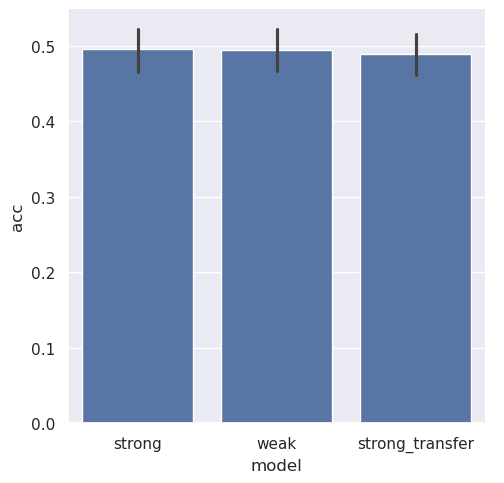

,model,acc
0,strong,0.495666
1,strong_transfer,0.488574
2,weak,0.494090


In [6]:
sns.set_theme()
p = sns.catplot(data=results_df, kind="bar", x="model", y="acc")
# p.set(ylim=(0.85, 0.9)) 
plt.show()

results_df.groupby('model')['acc'].mean().reset_index()

## ROC

strong model's Confusion Matrix:
[[356 276]
 [364 273]]
Accuracy: 0.49566587864460204
Precision: 0.4972677595628415
Recall: 0.42857142857142855
F1 Score: 0.46037099494097805
AUC: 0.5034030165133239

weak model's Confusion Matrix:
[[288 344]
 [298 339]]
Accuracy: 0.4940898345153664
Precision: 0.49633967789165445
Recall: 0.5321821036106751
F1 Score: 0.5136363636363637
AUC: 0.5074816684219939

strong_transfer model's Confusion Matrix:
[[282 350]
 [299 338]]
Accuracy: 0.48857368006304175
Precision: 0.49127906976744184
Recall: 0.5306122448979592
F1 Score: 0.510188679245283
AUC: 0.48509131013651813



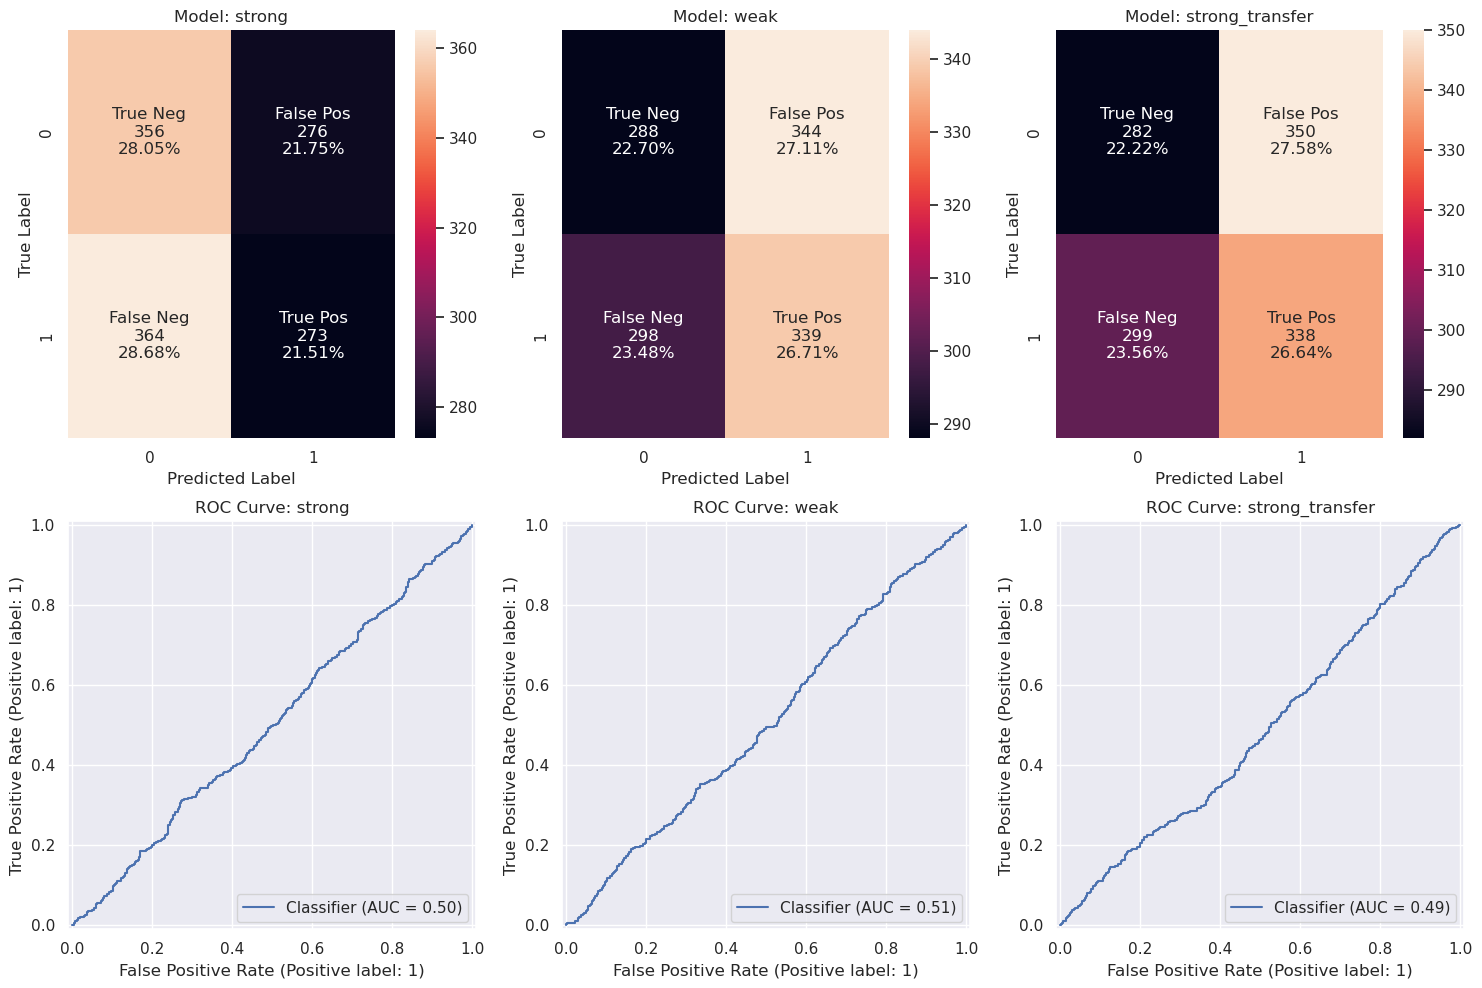

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = ['strong', 'weak', 'strong_transfer']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjusted figsize for clearer visibility

for idx, model in enumerate(models):
    df_filtered = results_df[results_df['model'] == model]
    y_test = df_filtered['gt_label'].tolist()
    y_pred = df_filtered['pred_hard_label'].tolist()
    y_prob = df_filtered['soft_label'].apply(lambda x: x[1]).tolist()
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Printing the results
    print(f"{model} model's Confusion Matrix:")
    print(cf_matrix)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}\n")

    sns.heatmap(cf_matrix, annot=labels, fmt='', ax=axes[0, idx])
    axes[0, idx].set_title(f'Model: {model}')
    axes[0, idx].set_xlabel('Predicted Label')
    axes[0, idx].set_ylabel('True Label')

    RocCurveDisplay.from_predictions(y_test, y_prob, ax=axes[1, idx])
    axes[1, idx].set_title(f'ROC Curve: {model}')

plt.tight_layout()
plt.show()

Check the histogram of soft label probabilities. Probabilities are nearly uniformly distributed with some density around 0.5

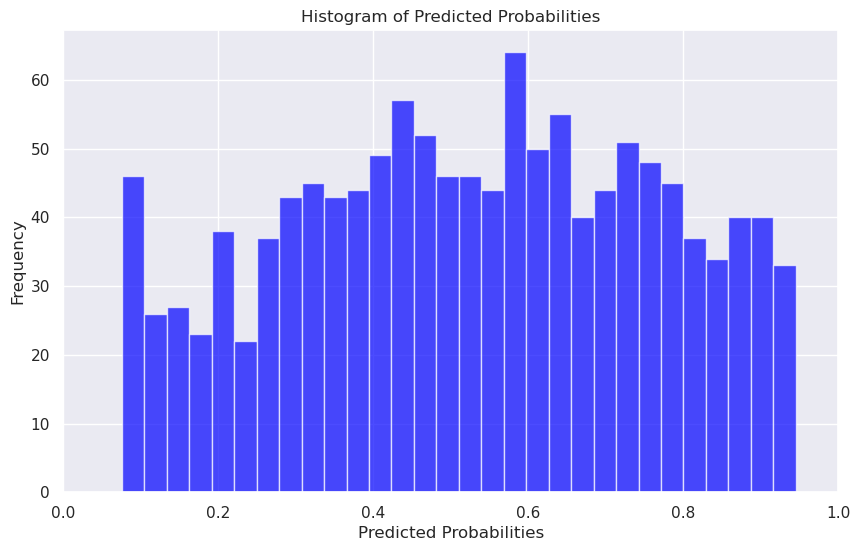

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=30, color='blue', alpha=0.7)  # bins parameter defines the number of intervals or "bins"
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.xlim(0,1)
plt.grid(True)
plt.show()

Look over training history

In [9]:
import json

# Function to load a .jsonl file and return a list of dictionaries
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_obj = json.loads(line.strip())
            data.append(json_obj)
    return data

# Load the data
strong_transfer_history_dir = '../results_v1/results_medqa_token512_epoch5_batch32/strong_model_transfer/EleutherAI_pythia-70m_step121000_EleutherAI_pythia-160m_step121000_xent/log.jsonl'
strong_history_dir = '../results_v1/results_medqa_token512_epoch5_batch32/strong_model_gt/EleutherAI_pythia-160m/step121000/log.jsonl'
weak_history_dir = '../results_v1/results_medqa_token512_epoch5_batch32/weak_model_gt/EleutherAI_pythia-70m/step121000/log.jsonl'

strong_transfer_logs = pd.DataFrame(load_jsonl(strong_transfer_history_dir))
strong_logs = pd.DataFrame(load_jsonl(strong_history_dir))
weak_logs = pd.DataFrame(load_jsonl(weak_history_dir))
weak_logs

,eval_accuracy,step,progress,loss,train_accuracy,lr
0,0.49803,0.0,0.000000,0.693147,0.416667,5.000000e-05
1,NaN,1.0,0.002364,0.754514,0.500000,4.999931e-05
2,NaN,2.0,0.004728,0.745591,0.433333,4.999724e-05
3,NaN,3.0,0.007092,0.692807,0.533333,4.999379e-05
4,NaN,4.0,0.009456,0.747265,0.400000,4.998897e-05
...,...,...,...,...,...,...
419,NaN,419.0,0.990544,0.301878,0.883333,1.103106e-08
420,NaN,420.0,0.992908,0.257709,0.916667,6.205168e-09
421,NaN,421.0,0.995272,0.246631,0.950000,2.757916e-09
422,NaN,422.0,0.997636,0.166137,0.950000,6.894885e-10


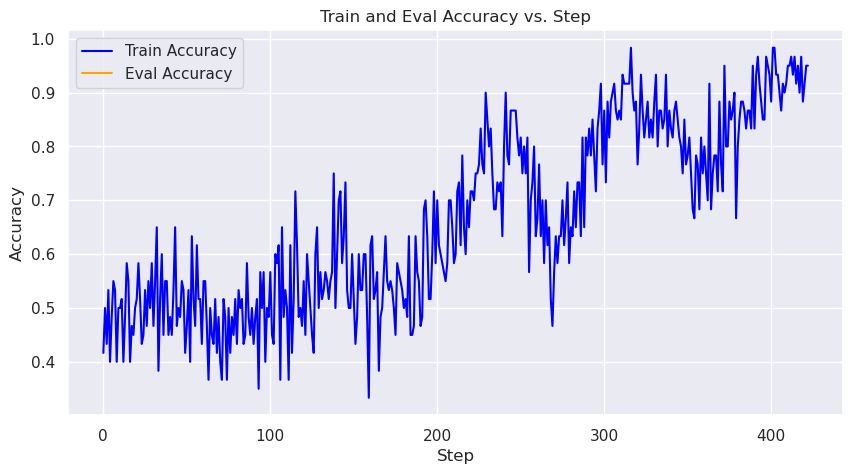

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(weak_logs['step'], weak_logs['train_accuracy'], label='Train Accuracy', color='blue')
plt.plot(weak_logs['step'], weak_logs['eval_accuracy'], label='Eval Accuracy', color='orange')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Train and Eval Accuracy vs. Step')
plt.legend()
plt.grid(True)
plt.show()

## Review demographic information from MedQA 

In [11]:
test_df = pd.DataFrame(results_df['txt'].unique(), columns=['text'])

# Split the 'text' column at 'A:' to separate questions and answers
# The `n=1` argument splits the string only at the first occurrence of 'A:'
test_df[['question', 'answer']] = test_df['text'].str.split(' A: ', n=1, expand=True)
# Remove prefix
test_df['question'] = test_df['question'].str.replace('^Q: ', '', regex=True)
test_df

,text,question,answer
0,Q: A junior orthopaedic surgery resident is co...,A junior orthopaedic surgery resident is compl...,Disclose the error to the patient and put it i...
1,Q: A 67-year-old man with transitional cell ca...,A 67-year-old man with transitional cell carci...,Inhibition of proteasome
2,Q: Two weeks after undergoing an emergency car...,Two weeks after undergoing an emergency cardia...,Cholesterol embolization
3,Q: A 39-year-old woman is brought to the emerg...,A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming..."
4,Q: A 35-year-old man comes to the physician be...,A 35-year-old man comes to the physician becau...,Warm compresses
...,...,...,...
1264,Q: A 39-year-old woman presents to the clinic ...,A 39-year-old woman presents to the clinic for...,Thyroid-stimulating hormone (TSH)
1265,Q: A 38-year-old woman comes to the physician ...,A 38-year-old woman comes to the physician bec...,Medication abuse
1266,Q: A 21-year-old college student comes to the ...,A 21-year-old college student comes to the phy...,Stop evening exercise
1267,Q: A 19-year-old man is brought to the physici...,A 19-year-old man is brought to the physician ...,Schizophrenia


In [12]:
test_df.iloc[1,0]

"Q: A 67-year-old man with transitional cell carcinoma of the bladder comes to the physician because of a 2-day history of ringing sensation in his ear. He received this first course of neoadjuvant chemotherapy 1 week ago. Pure tone audiometry shows a sensorineural hearing loss of 45 dB. The expected beneficial effect of the drug that caused this patient's symptoms is most likely due to which of the following actions? A: Inhibition of proteasome"

In [13]:
test_df.to_csv('../data/medQA_rebuilt.csv', index=False)

Extract age and gender demographic information from the medQA questions

In [14]:
import re

def find_demographics(text):
    age = re.findall(r'\b(\d+)-year-old\b', text)
    gender = re.findall(r'\b(man|woman|male|female)\b', text, re.IGNORECASE)
    age = age[0] if age else None
    gender = gender[0].lower() if gender else None
    return age, gender

def categorize_age(age):
    if age is None:
        return None
    age = int(age)
    if age < 18:
        return "child"
    elif 18 <= age <= 40:
        return "young"
    elif 41 <= age <= 60:
        return "middle-aged"
    else:
        return "old"
    
# Apply the function to the 'question' column
demographic_data = test_df['question'].apply(lambda x: find_demographics(x))
demographic_df = pd.DataFrame(demographic_data.tolist(), columns=['Age', 'Gender'])

# Join demographic data with the original dataset
combined_data = test_df.join(demographic_df)
# Apply age categorization
combined_data['Age Category'] = combined_data['Age'].apply(categorize_age)

combined_data



,text,question,answer,Age,Gender,Age Category
0,Q: A junior orthopaedic surgery resident is co...,A junior orthopaedic surgery resident is compl...,Disclose the error to the patient and put it i...,None,None,None
1,Q: A 67-year-old man with transitional cell ca...,A 67-year-old man with transitional cell carci...,Inhibition of proteasome,67,man,old
2,Q: Two weeks after undergoing an emergency car...,Two weeks after undergoing an emergency cardia...,Cholesterol embolization,61,man,old
3,Q: A 39-year-old woman is brought to the emerg...,A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming...",39,woman,young
4,Q: A 35-year-old man comes to the physician be...,A 35-year-old man comes to the physician becau...,Warm compresses,35,man,young
...,...,...,...,...,...,...
1264,Q: A 39-year-old woman presents to the clinic ...,A 39-year-old woman presents to the clinic for...,Thyroid-stimulating hormone (TSH),39,woman,young
1265,Q: A 38-year-old woman comes to the physician ...,A 38-year-old woman comes to the physician bec...,Medication abuse,38,woman,young
1266,Q: A 21-year-old college student comes to the ...,A 21-year-old college student comes to the phy...,Stop evening exercise,21,None,young
1267,Q: A 19-year-old man is brought to the physici...,A 19-year-old man is brought to the physician ...,Schizophrenia,19,man,young


In [15]:
results_df.rename(columns={'txt': 'text'}, inplace=True)
full_df = pd.merge(results_df, combined_data, on='text', how='inner')
full_df

,model,text,input_ids,gt_label,pred_hard_label,acc,logits,soft_label,question,answer,Age,Gender,Age Category
0,strong,Q: A junior orthopaedic surgery resident is co...,"[50, 27, 329, 19394, 9373, 20414, 39877, 5869,...",0,0,True,"[0.37400543689727783, -0.3740059435367584]","[0.6787452101707458, 0.32125476002693176]",A junior orthopaedic surgery resident is compl...,Disclose the error to the patient and put it i...,None,None,None
1,strong,Q: A 67-year-old man with transitional cell ca...,"[50, 27, 329, 9963, 14, 2913, 14, 744, 637, 34...",0,1,False,"[-1.0966973304748535, 1.0966968536376953]","[0.10034526139497757, 0.8996546864509583]",A 67-year-old man with transitional cell carci...,Inhibition of proteasome,67,man,old
2,strong,Q: Two weeks after undergoing an emergency car...,"[50, 27, 5761, 3618, 846, 17362, 271, 8945, 10...",1,0,False,"[0.678036093711853, -0.6780365705490112]","[0.7951206564903259, 0.20487934350967407]",Two weeks after undergoing an emergency cardia...,Cholesterol embolization,61,man,old
3,strong,Q: A 39-year-old woman is brought to the emerg...,"[50, 27, 329, 6931, 14, 2913, 14, 744, 3416, 3...",1,1,True,"[-1.3046934604644775, 1.3046932220458984]","[0.06853675097227097, 0.9314632415771484]",A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming...",39,woman,young
4,strong,Q: A 35-year-old man comes to the physician be...,"[50, 27, 329, 4791, 14, 2913, 14, 744, 637, 32...",0,1,False,"[-1.3566125631332397, 1.3566124439239502]","[0.0621974840760231, 0.9378025531768799]",A 35-year-old man comes to the physician becau...,Warm compresses,35,man,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,strong_transfer,Q: A 39-year-old woman presents to the clinic ...,"[50, 27, 329, 6931, 14, 2913, 14, 744, 3416, 1...",1,1,True,"[-0.8586342334747314, 0.8586330413818359]","[0.15222349762916565, 0.8477765321731567]",A 39-year-old woman presents to the clinic for...,Thyroid-stimulating hormone (TSH),39,woman,young
3803,strong_transfer,Q: A 38-year-old woman comes to the physician ...,"[50, 27, 329, 6480, 14, 2913, 14, 744, 3416, 3...",1,1,True,"[-0.5650439262390137, 0.5650427937507629]","[0.24414511024951935, 0.7558549046516418]",A 38-year-old woman comes to the physician bec...,Medication abuse,38,woman,young
3804,strong_transfer,Q: A 21-year-old college student comes to the ...,"[50, 27, 329, 3127, 14, 2913, 14, 744, 6831, 5...",1,1,True,"[-0.24028830230236053, 0.24028730392456055]","[0.3821162283420563, 0.6178838014602661]",A 21-year-old college student comes to the phy...,Stop evening exercise,21,None,young
3805,strong_transfer,Q: A 19-year-old man is brought to the physici...,"[50, 27, 329, 655, 14, 2913, 14, 744, 637, 310...",0,1,False,"[-1.035049319267273, 1.0350481271743774]","[0.11203735321760178, 0.8879626393318176]",A 19-year-old man is brought to the physician ...,Schizophrenia,19,man,young


In [16]:
full_df['Gender'] = full_df['Gender'].replace({
    'man': 'Male',
    'male': 'Male',
    'woman': 'Female',
    'female': 'Female'
})

# Replace missing values with 'None'
full_df['Gender'].fillna('None', inplace=True)
full_df['Gender'].unique()

/tmp/ipykernel_493/824449180.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Gender'].fillna('None', inplace=True)


array(['None', 'Male', 'Female'], dtype=object)

In [17]:
full_df['Age Category'].fillna('None', inplace=True)
full_df['Age Category'].unique()

/tmp/ipykernel_493/2612608741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age Category'].fillna('None', inplace=True)


array(['None', 'old', 'young', 'middle-aged', 'child'], dtype=object)

In [18]:
# Review demographic information
print(f"Total row numbers of data {combined_data.shape[0]}")
age_info_count = combined_data['Age'].notna().sum()
print(f"Count valid age entries {age_info_count}")
gender_info_count = combined_data['Gender'].notna().sum()
print(f"Count valid gender entries {gender_info_count}")
print(combined_data['Gender'].value_counts())
print(combined_data['Age Category'].value_counts())


Total row numbers of data 1269
Count valid age entries 1125
Count valid gender entries 974
Gender
man       434
woman     382
male       91
female     67
Name: count, dtype: int64
Age Category
young          445
middle-aged    291
old            229
child          160
Name: count, dtype: int64


Evaluate diffrent model's performance on each gender and age category

In [19]:
# Evaluate gender metrics
genders = full_df['Gender'].unique()
gender_metrics = {}

for gender in genders:
    for model in models:
        # Filter data for current gender and model
        model_data = full_df[(full_df['Gender'] == gender) & (full_df['model'] == model)]
        if not model_data.empty:
            y_test = model_data['gt_label'].tolist()
            y_pred = model_data['pred_hard_label'].tolist()
            y_prob = model_data['soft_label'].apply(lambda x: x[1]).tolist()

            # Calculate confusion matrix and other metrics
            cf_matrix = confusion_matrix(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc = roc_auc_score(y_test, y_prob)

            # Store results
            if gender not in gender_metrics:
                gender_metrics[gender] = {}
            gender_metrics[gender][model] = {
                'Confusion Matrix': cf_matrix,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1,
                'AUC': auc
            }
        else:
            # Handle case where no data is available for a model under a specific gender
            if gender not in gender_metrics:
                gender_metrics[gender] = {}
            gender_metrics[gender][model] = "No data available"

gender_metrics


{'None': {'strong': {'Confusion Matrix': array([[85, 53],
          [82, 75]]),
   'Accuracy': 0.5423728813559322,
   'Precision': 0.5859375,
   'Recall': 0.47770700636942676,
   'F1 Score': 0.5263157894736842,
   'AUC': 0.5689559678759346},
  'weak': {'Confusion Matrix': array([[63, 75],
          [63, 94]]),
   'Accuracy': 0.5322033898305085,
   'Precision': 0.5562130177514792,
   'Recall': 0.5987261146496815,
   'F1 Score': 0.5766871165644172,
   'AUC': 0.5569094433674882},
  'strong_transfer': {'Confusion Matrix': array([[60, 78],
          [66, 91]]),
   'Accuracy': 0.511864406779661,
   'Precision': 0.5384615384615384,
   'Recall': 0.5796178343949044,
   'F1 Score': 0.558282208588957,
   'AUC': 0.5141696667589772}},
 'Male': {'strong': {'Confusion Matrix': array([[143, 129],
          [149, 104]]),
   'Accuracy': 0.4704761904761905,
   'Precision': 0.44635193133047213,
   'Recall': 0.41106719367588934,
   'F1 Score': 0.4279835390946502,
   'AUC': 0.4683939781446176},
  'weak': {'

In [20]:
# Evaluate age category metrics
ages = full_df['Age Category'].unique()
age_metrics = {}

for age in ages:
    for model in models:
        # Filter data for current age and model
        model_data = full_df[(full_df['Age Category'] == age) & (full_df['model'] == model)]
        y_test = model_data['gt_label'].tolist()
        y_pred = model_data['pred_hard_label'].tolist()
        y_prob = model_data['soft_label'].apply(lambda x: x[1]).tolist()

        # Calculate confusion matrix and other metrics
        cf_matrix = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_prob)

        # Store results
        if age not in age_metrics:
            age_metrics[age] = {}
        age_metrics[age][model] = {
            'Confusion Matrix': cf_matrix,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC': auc
        }


age_metrics


{'None': {'strong': {'Confusion Matrix': array([[43, 24],
          [40, 37]]),
   'Accuracy': 0.5555555555555556,
   'Precision': 0.6065573770491803,
   'Recall': 0.4805194805194805,
   'F1 Score': 0.5362318840579711,
   'AUC': 0.5966272533436713},
  'weak': {'Confusion Matrix': array([[27, 40],
          [36, 41]]),
   'Accuracy': 0.4722222222222222,
   'Precision': 0.5061728395061729,
   'Recall': 0.5324675324675324,
   'F1 Score': 0.5189873417721519,
   'AUC': 0.49214964140337275},
  'strong_transfer': {'Confusion Matrix': array([[33, 34],
          [38, 39]]),
   'Accuracy': 0.5,
   'Precision': 0.5342465753424658,
   'Recall': 0.5064935064935064,
   'F1 Score': 0.52,
   'AUC': 0.5190928474510565}},
 'old': {'strong': {'Confusion Matrix': array([[72, 60],
          [60, 37]]),
   'Accuracy': 0.4759825327510917,
   'Precision': 0.38144329896907214,
   'Recall': 0.38144329896907214,
   'F1 Score': 0.38144329896907214,
   'AUC': 0.4664167447672603},
  'weak': {'Confusion Matrix': arr

In [21]:
# Print age category metrics result in table
import copy
age_metrics2 = copy.deepcopy(age_metrics)
for age_category in age_metrics2:
    for model in age_metrics2[age_category]:
        if 'Confusion Matrix' in age_metrics2[age_category][model]:
            del age_metrics2[age_category][model]['Confusion Matrix']

def create_dataframe(category_data):
    return pd.DataFrame.from_dict(category_data, orient='index')
age_metrics_df = {category: create_dataframe(age_metrics2[category]) for category in age_metrics2}
pd.set_option('display.precision', 4)
print('None:')
print(age_metrics_df['None'])
print('\nChild:')
print(age_metrics_df['child'])
print('\nYoung:')
print(age_metrics_df['young'])
print('\nMiddle-aged')
print(age_metrics_df['middle-aged'])
print('\nOld:')
print(age_metrics_df['old'])

None:
                 Accuracy  Precision  Recall  F1 Score     AUC
strong             0.5556     0.6066  0.4805    0.5362  0.5966
weak               0.4722     0.5062  0.5325    0.5190  0.4921
strong_transfer    0.5000     0.5342  0.5065    0.5200  0.5191

Child:
                 Accuracy  Precision  Recall  F1 Score     AUC
strong             0.5125     0.5441  0.4405    0.4868  0.5465
weak               0.5500     0.5625  0.6429    0.6000  0.5746
strong_transfer    0.5125     0.5312  0.6071    0.5667  0.5158

Young:
                 Accuracy  Precision  Recall  F1 Score     AUC
strong             0.4742     0.4872  0.4148    0.4481  0.4939
weak               0.4944     0.5091  0.4891    0.4989  0.5147
strong_transfer    0.4854     0.5000  0.5240    0.5117  0.4803

Middle-aged
                 Accuracy  Precision  Recall  F1 Score     AUC
strong             0.5052     0.5234  0.4467    0.4820  0.4847
weak               0.4605     0.4777  0.5000    0.4886  0.4655
strong_transfer    0

## Visualize performance by gender

In [23]:
# Create a DataFrame from the extracted text data
data = {
    "Gender": ["None", "None", "None", "Female", "Female", "Female", "Male", "Male", "Male"],
    "Model": ["Weak", "W2S", "Strong", "Weak", "W2S", "Strong", "Weak", "W2S", "Strong"],
    "Accuracy": ["53.22%", "51.19%", "54.24%", "48.55%", "50.33%", "49.44%", "48.00%", "46.29%", "47.05%"],
    "Precision": ["55.62%", "53.85%", "58.59%", "49.12%", "50.84%", "50.00%", "46.50%", "44.84%", "44.64%"],
    "Recall": ["59.87%", "57.96%", "47.77%", "49.34%", "53.30%", "41.41%", "52.57%", "49.80%", "41.11%"],
    "F1": ["57.67%", "55.83%", "53.63%", "49.23%", "52.04%", "45.30%", "49.35%", "47.19%", "42.80%"],
    "AUC": ["55.69%", "51.41%", "56.90%", "49.51%", "48.83%", "50.69%", "48.81%", "46.40%", "46.84%"]
}

gender_metrics_df = pd.DataFrame(data)
gender_metrics_df


,Gender,Model,Accuracy,Precision,Recall,F1,AUC
0,None,Weak,53.22%,55.62%,59.87%,57.67%,55.69%
1,None,W2S,51.19%,53.85%,57.96%,55.83%,51.41%
2,None,Strong,54.24%,58.59%,47.77%,53.63%,56.90%
3,Female,Weak,48.55%,49.12%,49.34%,49.23%,49.51%
4,Female,W2S,50.33%,50.84%,53.30%,52.04%,48.83%
5,Female,Strong,49.44%,50.00%,41.41%,45.30%,50.69%
6,Male,Weak,48.00%,46.50%,52.57%,49.35%,48.81%
7,Male,W2S,46.29%,44.84%,49.80%,47.19%,46.40%
8,Male,Strong,47.05%,44.64%,41.11%,42.80%,46.84%


In [28]:
gender_metrics_df['Accuracy'] = gender_metrics_df['Accuracy'].str.rstrip('%').astype(float) / 100

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


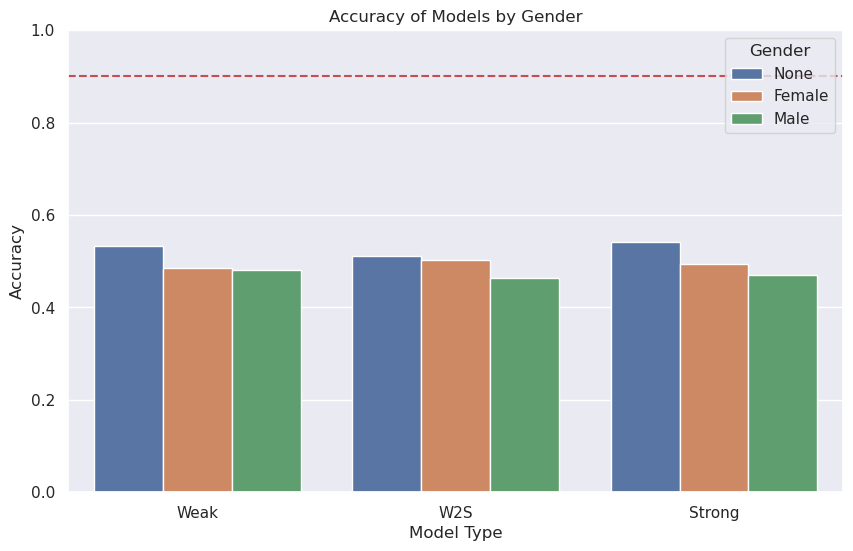

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_metrics_df, x='Model', y='Accuracy', hue='Gender')
plt.title('Accuracy of Models by Gender')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')
plt.legend(title='Gender')
plt.ylim(0,1)
plt.axhline(y=0.9, color='r', linestyle='--')

plt.savefig('MedQA_gender_metrics.pdf', format='pdf')
plt.show()
